[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]]


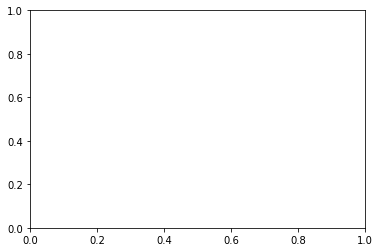

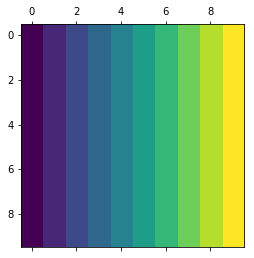

In [4]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import heapq, random

class myarray(np.ndarray):
    def __new__(cls, *args, **kwargs):
        return np.array(*args, **kwargs).view(myarray)
    def index(self, value):
        return np.where(self == value)

l = 10
num_seq = 1024
t_max = l + 1
Yield_fin = np.zeros(num_seq+1)
Soil_fin = np.zeros(num_seq+1)
Vir_fin = np.zeros(num_seq+1)


list_data = []
matrix1 = np.zeros((10,l))

for i in range(0,num_seq):

    csv_files = glob.glob("out{0}.csv".format(i+1)) #name of the files 
    for filename in csv_files:
        data = pd.read_csv(filename)
        list_data.append(data)
        Yield_fin[i] = np.copy(list_data[i].iloc[l,5])
        Soil_fin[i] = np.copy(list_data[i].iloc[l,4])
        Vir_fin[i] = np.copy(list_data[i].iloc[l,6])


ten_seq_max = Yield_fin.argsort()[-10:][::-1]
value_seq_max = max(Yield_fin)

j = 0
for i in ten_seq_max:
    matrix1[j] = list_data[i].iloc[0:l,0]
    j = j + 1

print(matrix1)

fig,ax = plt.subplots()
plt.matshow(matrix1, fignum=None)
plt.show()